# Income Analysis of adults
I have a selected a dataset from kaggle that has the income details of the adults from different parts of the country.And we will be trying to analysis the data and the difference of income and change in trends across countries and race.For a better vizualization of the data we would be using some libraries like matplotlib,seasborn for that purpose.I have been on this project based on the skills that I have gained from the tutorials of [Data Analysis with Python: Zero to Pandas](zerotopandas.com).
Link to the dataset: https://www.kaggle.com/ddmasterdon/income-adult

## Downloading the Dataset

We can download the above mentioned dataset using various techniques like using the urlretrieve from urllib.request but I have downloaded the dataset locally and I have uploaded to the notebook

In [1]:
import os
os.listdir('./Income-Analysis-Project')

['adult_data.csv']

As you can see from the above list of files you can find the 'adult_data.csv' which is our dataset

We will know import the pandas library and use the built-in functions

In [2]:
import pandas as pd

In [3]:
raw_df=pd.read_csv('./Income-Analysis-Project/adult_data.csv',skipinitialspace = True)

In [4]:
raw_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Let us save and upload our work to Jovian before continuing.

In [5]:
project_name = "zerotopandas-course-project-starter" # change this (use lowercase letters and hyphens only)

In [6]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [8]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bhanukrishnaprasad/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/bhanukrishnaprasad/zerotopandas-course-project-starter


'https://jovian.ai/bhanukrishnaprasad/zerotopandas-course-project-starter'

## Data Preparation and Cleaning

As we can see from the above dataframe there some reductant columns and there could even be some changes that has to be done.So now let us clean the dataframe step by step



In [9]:
raw_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In the above list of column names there is a space ahead of many column names and which could cause a problem while retriving the data from those columns

In [10]:
raw_df.columns=raw_df.columns.str.replace(" ","")

In [11]:
raw_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [12]:
selected_columns=['age','workclass','education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary']

In [13]:
details_df=raw_df[selected_columns]

I have removed some of the columns from the raw dataframe like the education as the education-num depicts the same data and the fnlwgt 

In [14]:
details_df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
import jovian

Let's have look at the info and details of the dataframe

In [16]:
details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  32561 non-null  object
 12  salary          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [17]:
details_df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [18]:
details_df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

#### When I checked the unique values in the occupation column and I have found a '?',let us check if we have any such values in the other fileds.

In [19]:
details_df.sample(50)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
28869,51,Federal-gov,13,Widowed,Prof-specialty,Not-in-family,Black,Female,0,0,40,United-States,<=50K
13374,33,Private,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
29409,39,Private,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
2526,41,Local-gov,9,Divorced,Prof-specialty,Unmarried,Asian-Pac-Islander,Female,0,0,40,United-States,<=50K
19888,21,Private,6,Separated,Sales,Unmarried,Black,Female,0,0,38,United-States,<=50K
2025,23,?,13,Never-married,?,Not-in-family,White,Female,0,0,50,United-States,<=50K
29591,29,Private,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,60,United-States,>50K
15219,26,Private,13,Never-married,Sales,Own-child,White,Female,0,0,45,?,<=50K
30623,72,?,10,Married-civ-spouse,?,Husband,White,Male,0,0,32,Canada,<=50K
24522,48,Self-emp-inc,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,40,United-States,>50K


In [20]:
details_df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [21]:
details_df['salary'].unique()

array(['<=50K', '>50K'], dtype=object)

In [22]:
details_df.drop(details_df[details_df['workclass']=='?'].index, inplace = True)
details_df.drop(details_df[details_df['occupation']=='?'].index, inplace = True)
details_df.drop(details_df[details_df['native-country']=='?'].index, inplace = True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
details_df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [24]:
details_df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving',
       'Farming-fishing', 'Machine-op-inspct', 'Tech-support',
       'Craft-repair', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

#### I have removed all the rows from the dataframe which any empty values and now let us look at the shape of the dataframe

In [25]:
details_df.shape

(30162, 13)

In [26]:
details_df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Lets us take a random sample of 20 rows check for any errors,if nothing is found we will move to the analysis of the dataset

In [27]:
details_df.sample(20)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
9609,38,Private,11,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,39,United-States,<=50K
23354,76,Private,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,20051,0,50,United-States,>50K
16305,33,Private,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
21127,25,Private,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
14318,27,Private,13,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
1910,38,Private,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
7651,40,Federal-gov,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1579,40,United-States,<=50K
9076,25,Private,11,Never-married,Adm-clerical,Own-child,White,Female,0,0,60,United-States,<=50K
3010,44,Self-emp-inc,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,60,United-States,<=50K
16686,23,Private,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


## Exploratory Analysis and Visualization

Before we ask questions about the income variations, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Country

In [29]:
details_df['native-country'].nunique()

41

As we can see there are 41 countries and as it would be difficult to repesent them on the grpahs we would pick the top 15 countries

In [30]:
top_countries=details_df['native-country'].value_counts().head(15)
top_countries

United-States         27504
Mexico                  610
Philippines             188
Germany                 128
Puerto-Rico             109
Canada                  107
El-Salvador             100
India                   100
Cuba                     92
England                  86
Jamaica                  80
South                    71
Italy                    68
China                    68
Dominican-Republic       67
Name: native-country, dtype: int64

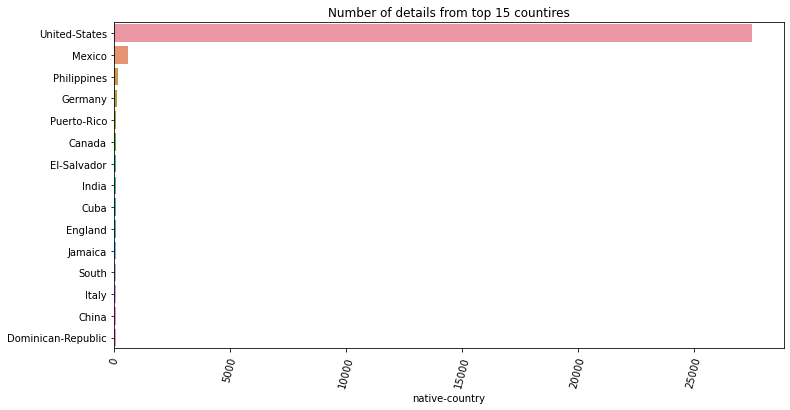

In [31]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Number of details from top 15 countires")
sns.barplot( x=top_countries,y=top_countries.index);

It appears that a disproportionately high number of respondents are from the USA

## Age

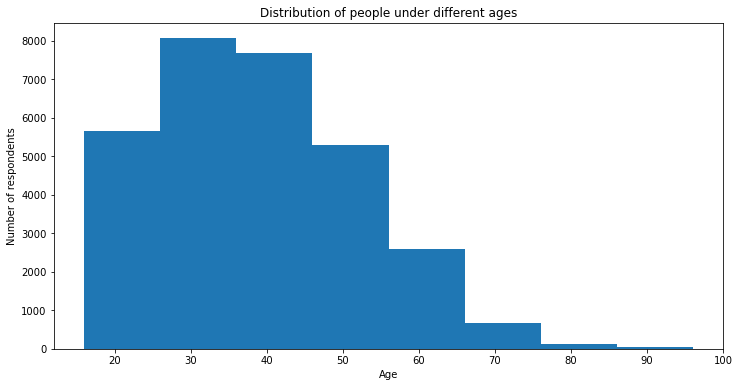

In [32]:
plt.figure(figsize=(12, 6))
plt.title("Distribution of people under different ages")
plt.xlabel('Age')
plt.ylabel('Number of respondents')
import numpy as np
plt.hist(details_df.age, bins=np.arange(16,100,10));

From the above graph we could see that most of the earning people are in the age group of 25-45

## Gender 

In [33]:
gender_counts=details_df.sex.value_counts()

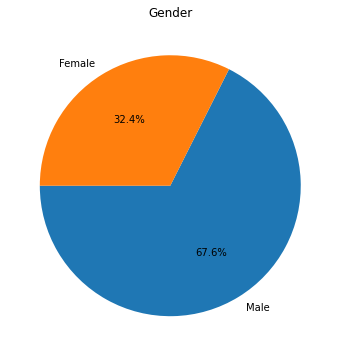

In [34]:
plt.figure(figsize=(12,6))
plt.title("Gender")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

There is a huge variation in the number in the working women and the working men.But as the data is collected from the United states mostly we could expect such a 1:2 ratio in the numbers.Any way we will be analysis this in detail futher.

## Race

In [35]:
race_counts=details_df.race.value_counts()

In [36]:
race_counts

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

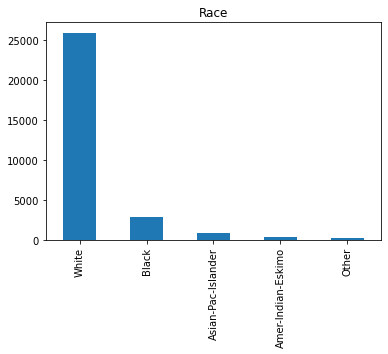

In [37]:
race_counts.plot(kind='bar')
plt.title("Race");

## Workclass

Let's now have a look on the different working classes present

In [38]:
details_df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [39]:
workclass_counts=details_df.workclass.value_counts()
workclass_counts

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

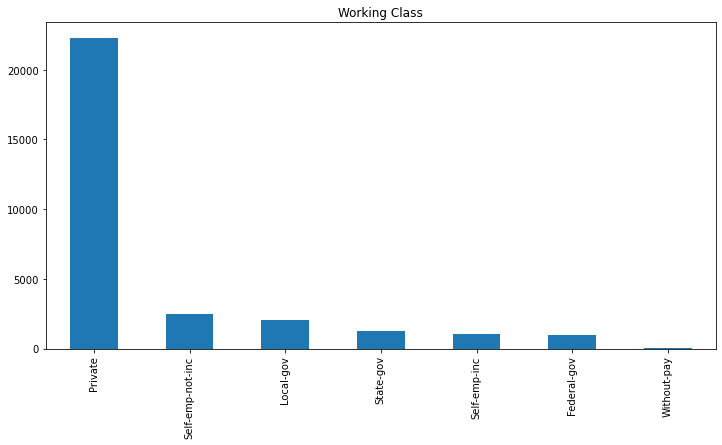

In [40]:
plt.figure(figsize=(12,6))
workclass_counts.plot(kind='bar')
plt.title("Working Class");

In [41]:
details_df.occupation.value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

Most of the people are priavtely employed and there is almost a negligible number of people working without pay

## Education Number

In [42]:
details_df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2])

The numbers in the range of 1-16 describe the thier education standards,where 16 being the heighest education qulification and 1 being the leat qualification

In [43]:
education_counts=details_df['education-num'].value_counts()
education_counts

9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: education-num, dtype: int64

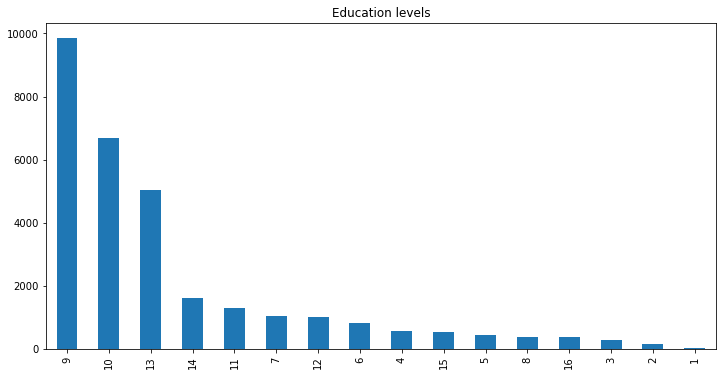

In [44]:
plt.figure(figsize=(12,6))
education_counts.plot(kind='bar')
plt.title("Education levels");

From the above graph we could see that most of the have studied till thier high-grad and some till college

Let us save and upload our work to Jovian before continuing

## Salary

In [45]:
details_df.salary.value_counts()

<=50K    22654
>50K      7508
Name: salary, dtype: int64

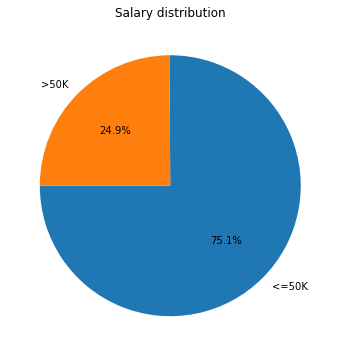

In [46]:
plt.figure(figsize=(12,6))
plt.title("Salary distribution")
plt.pie(details_df.salary.value_counts(), labels=details_df.salary.value_counts().index, autopct='%1.1f%%', startangle=180);

About 75% of the people as an earnings <=50k and we would analyze the salary of different races,different working classes in the next section.

In [47]:
import jovian

## Asking and Answering Questions

We've already gained several insights about the respondents by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: What is the most-common occupation in the countires other than United States

In [48]:
details_df.sample(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
19068,56,Private,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
26114,35,Private,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,70,United-States,<=50K
16630,44,State-gov,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Female,0,0,38,United-States,<=50K
28525,47,Local-gov,10,Divorced,Prof-specialty,Not-in-family,White,Female,0,1876,40,United-States,<=50K
19024,27,Private,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
6987,37,Private,6,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,65,United-States,<=50K
18760,46,Private,5,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
18899,58,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,10,United-States,>50K
3483,41,Private,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,England,<=50K
4166,18,Private,7,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States,<=50K


In [49]:
non_us_df=details_df[details_df['native-country']!="United-States"]

In [50]:
non_us_df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
11,30,State-gov,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
15,34,Private,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
35,48,Private,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,85,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
32508,45,Private,6,Divorced,Other-service,Not-in-family,Black,Female,0,0,38,Dominican-Republic,<=50K
32533,54,Private,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32547,43,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K


In [51]:
print(details_df.shape)
print(non_us_df.shape)

(30162, 13)
(2658, 13)


And I have created a new dataframe that has only the deatils of the countires other than United states,as most of the data is collected from united states it would distrub any analysis of the other counties statistis also

In [52]:
non_us_df.occupation.unique()

array(['Prof-specialty', 'Other-service', 'Transport-moving',
       'Machine-op-inspct', 'Exec-managerial', 'Adm-clerical', 'Sales',
       'Farming-fishing', 'Craft-repair', 'Handlers-cleaners',
       'Protective-serv', 'Priv-house-serv', 'Tech-support'], dtype=object)

In [53]:
non_us_df.occupation.value_counts()

Other-service        435
Craft-repair         345
Prof-specialty       345
Machine-op-inspct    279
Adm-clerical         272
Exec-managerial      257
Sales                220
Handlers-cleaners    161
Farming-fishing      110
Transport-moving      81
Tech-support          62
Priv-house-serv       53
Protective-serv       38
Name: occupation, dtype: int64

There is an almost uniform distribution among some of the occupations
And as we can see in the listed occupations the mentioned occupation which are mostly selected are Craft-repaor and Prof-specialty

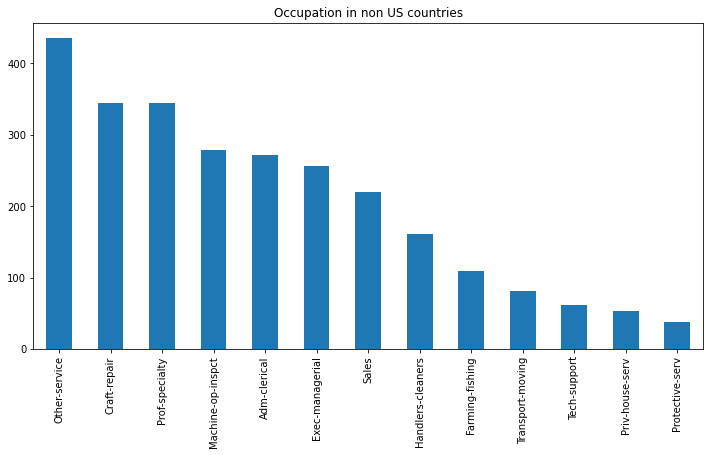

In [54]:
plt.figure(figsize=(12,6))
non_us_df.occupation.value_counts().plot(kind="bar")
plt.title("Occupation in non US countries");

Let's have a look at the United states most popular occupation too

In [55]:
us_df=details_df[details_df['native-country']=='United-States']

In [56]:
us_df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [57]:
us_df.occupation.value_counts()

Exec-managerial      3735
Prof-specialty       3693
Craft-repair         3685
Adm-clerical         3449
Sales                3364
Other-service        2777
Machine-op-inspct    1687
Transport-moving     1491
Handlers-cleaners    1189
Farming-fishing       879
Tech-support          850
Protective-serv       606
Priv-house-serv        90
Armed-Forces            9
Name: occupation, dtype: int64

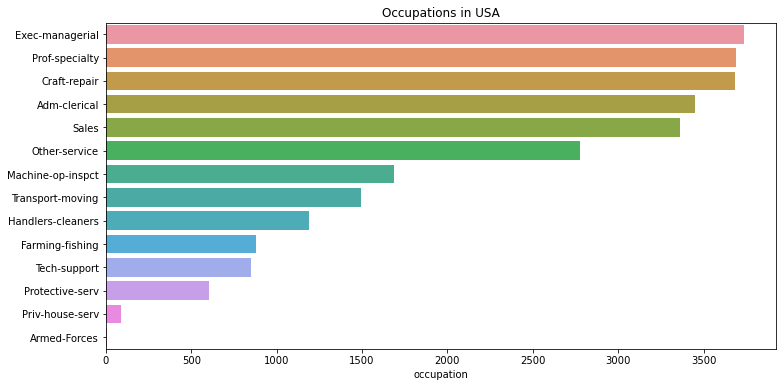

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(x=us_df.occupation.value_counts(),y=us_df.occupation.value_counts().index)

plt.title("Occupations in USA");

And it is very clear that the occupation in demand in United States is different from the other nations as most of the data is collected from United states it would have over shadowed the other countires data

#### Q2: Check the relation between the occupation vs working hours

In [59]:
details_df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [60]:
temp_df=details_df.groupby(['occupation']).mean()
temp_df

,age,education-num,capital-gain,capital-loss,hours-per-week
occupation,,,,,
Adm-clerical,37.004569,10.108035,497.097286,59.987638,37.561408
Armed-Forces,30.222222,10.111111,0.000000,209.666667,40.666667
Craft-repair,38.976675,9.117866,657.586849,86.510918,42.298015
Exec-managerial,42.183116,11.438878,2185.330912,139.224198,44.966934
Farming-fishing,41.251769,8.614762,592.707786,63.394338,46.990900
Handlers-cleaners,32.114815,8.495556,258.140000,44.220000,37.874815
Machine-op-inspct,37.693795,8.475585,323.825025,58.526450,40.707019
Other-service,34.905978,8.778643,181.705479,36.874222,34.605542
Priv-house-serv,42.034965,7.223776,291.594406,22.349650,32.797203


In [61]:
temp_df['hours-per-week'].sort_values(ascending=False)

occupation
Farming-fishing      46.990900
Exec-managerial      44.966934
Transport-moving     44.650127
Protective-serv      42.846273
Prof-specialty       42.374938
Craft-repair         42.298015
Sales                40.763393
Machine-op-inspct    40.707019
Armed-Forces         40.666667
Tech-support         39.473684
Handlers-cleaners    37.874815
Adm-clerical         37.561408
Other-service        34.605542
Priv-house-serv      32.797203
Name: hours-per-week, dtype: float64

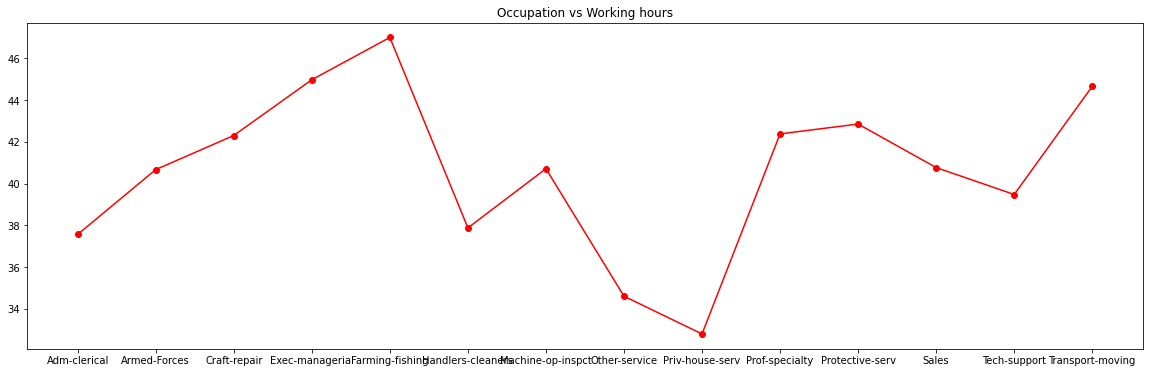

In [79]:
plt.figure(figsize=(20,6))
plt.title("Occupation vs Working hours")
plt.ylabel="Working Hours"
plt.plot(temp_df.index,temp_df['hours-per-week'],'r-o');

I have grouped the dataframe based on their occupation and checked the working hours based on thier occupation.
from the above data it is evident that Farming-Fishing has more working hours.
And the private house service has the comparatively least working hours per week.

In [62]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bhanukrishnaprasad/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/bhanukrishnaprasad/zerotopandas-course-project-starter


'https://jovian.ai/bhanukrishnaprasad/zerotopandas-course-project-starter'

#### Q3: Which occupation has the heighest capital gain and heighest capital loss

We can use the temporary dataframe that is formed by grouping the dataframe based on the occupation

In [80]:
temp_df

,age,education-num,capital-gain,capital-loss,hours-per-week
occupation,,,,,
Adm-clerical,37.004569,10.108035,497.097286,59.987638,37.561408
Armed-Forces,30.222222,10.111111,0.000000,209.666667,40.666667
Craft-repair,38.976675,9.117866,657.586849,86.510918,42.298015
Exec-managerial,42.183116,11.438878,2185.330912,139.224198,44.966934
Farming-fishing,41.251769,8.614762,592.707786,63.394338,46.990900
Handlers-cleaners,32.114815,8.495556,258.140000,44.220000,37.874815
Machine-op-inspct,37.693795,8.475585,323.825025,58.526450,40.707019
Other-service,34.905978,8.778643,181.705479,36.874222,34.605542
Priv-house-serv,42.034965,7.223776,291.594406,22.349650,32.797203


In [83]:
temp_df['capital-gain'].sort_values(ascending=False)

occupation
Prof-specialty       2717.880139
Exec-managerial      2185.330912
Sales                1308.637835
Protective-serv       713.596273
Tech-support          668.105263
Craft-repair          657.586849
Farming-fishing       592.707786
Transport-moving      498.121501
Adm-clerical          497.097286
Machine-op-inspct     323.825025
Priv-house-serv       291.594406
Handlers-cleaners     258.140000
Other-service         181.705479
Armed-Forces            0.000000
Name: capital-gain, dtype: float64

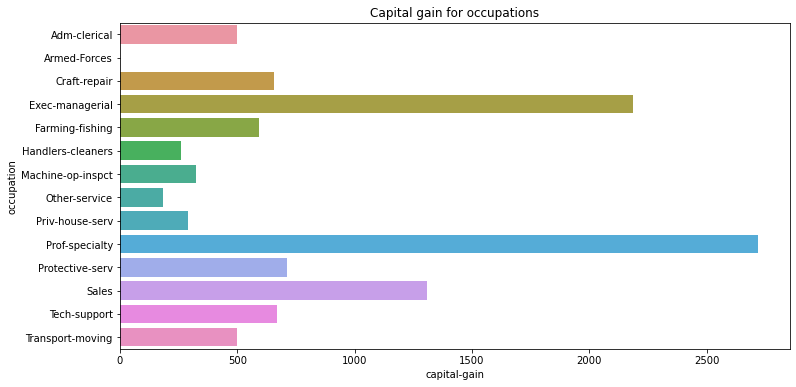

In [85]:
plt.figure(figsize=(12,6))
sns.barplot(x=temp_df['capital-gain'],y=temp_df['capital-gain'].index)
plt.title("Capital gain for occupations");

The people who are specialits have a whooping income compared to the other occupations.
And the people who work in the armed forces have no capital gain.

In [86]:
temp_df['capital-loss'].sort_values(ascending=False)

occupation
Armed-Forces         209.666667
Exec-managerial      139.224198
Prof-specialty       136.436107
Sales                 99.141183
Tech-support          98.311404
Craft-repair          86.510918
Transport-moving      82.776718
Protective-serv       78.942547
Farming-fishing       63.394338
Adm-clerical          59.987638
Machine-op-inspct     58.526450
Handlers-cleaners     44.220000
Other-service         36.874222
Priv-house-serv       22.349650
Name: capital-loss, dtype: float64

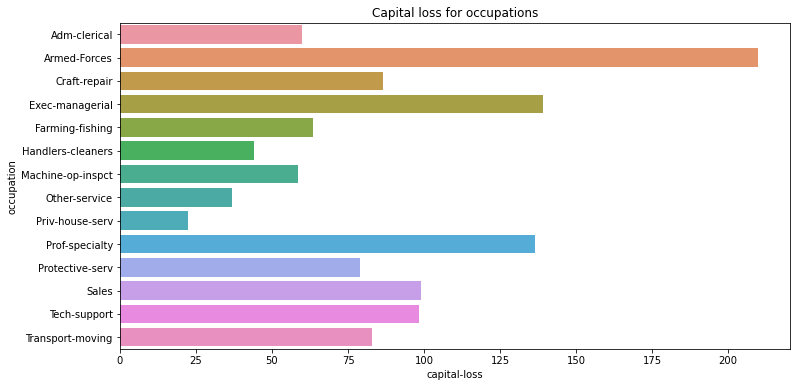

In [88]:
plt.figure(figsize=(12,6))
sns.barplot(x=temp_df['capital-loss'],y=temp_df['capital-loss'].index)
plt.title("Capital loss for occupations");

The people from the armed forces have the heighest capital loss compared to the other occupations.
We can also see that the specialists have capital losses and gain considerably

#### Q3: Which age group and which occupation is earning >50K

In [92]:
high_salary=details_df[details_df.salary==">50K"]

In [93]:
high_salary

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32545,39,Local-gov,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [110]:
high_salary.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000
mean,43.959110,11.606420,3937.679808,193.750666,45.706580
std,10.269633,2.368423,14386.060019,592.825590,10.736987
min,19.000000,2.000000,0.000000,0.000000,1.000000
25%,36.000000,10.000000,0.000000,0.000000,40.000000
50%,43.000000,12.000000,0.000000,0.000000,40.000000
75%,51.000000,13.000000,0.000000,0.000000,50.000000
max,90.000000,16.000000,99999.000000,3683.000000,99.000000


Now,I have selected the data of the people who has a salary >50K and let us group the dataframe based on their occupation.

In [96]:
high_salary.groupby(['occupation']).mean()

,age,education-num,capital-gain,capital-loss,hours-per-week
occupation,,,,,
Adm-clerical,43.299197,10.716867,2819.082329,119.753012,40.839357
Armed-Forces,46.000000,14.000000,0.000000,1887.000000,40.000000
Craft-repair,43.735683,9.817181,2407.403084,153.394273,44.656388
Exec-managerial,44.893650,12.089830,4307.764068,224.303562,47.308209
Farming-fishing,47.060870,10.008696,3070.678261,214.469565,54.208696
Handlers-cleaners,43.240964,9.277108,2483.746988,163.939759,42.349398
Machine-op-inspct,42.297959,9.351020,1507.987755,148.293878,43.310204
Other-service,41.371212,10.136364,2579.871212,127.439394,42.901515
Priv-house-serv,47.000000,13.000000,25236.000000,0.000000,35.000000


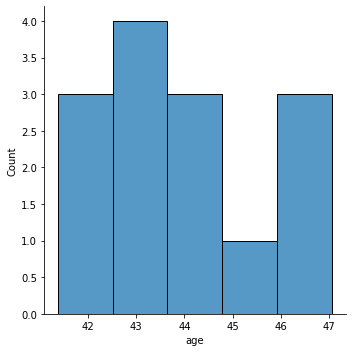

In [102]:
sns.displot(high_salary.groupby(['occupation']).mean().age, kde=False);

We could see that the mean age is 43years and it is also evident that to earn a salary >50K in any field they have to gain a good expiernce and all the professions has a mean age above 40 years

Let's check which occupation has more people earning a salary >50K

In [111]:
high_salary.occupation.value_counts()

Exec-managerial      1937
Prof-specialty       1811
Sales                 970
Craft-repair          908
Adm-clerical          498
Transport-moving      319
Tech-support          278
Machine-op-inspct     245
Protective-serv       210
Other-service         132
Farming-fishing       115
Handlers-cleaners      83
Armed-Forces            1
Priv-house-serv         1
Name: occupation, dtype: int64

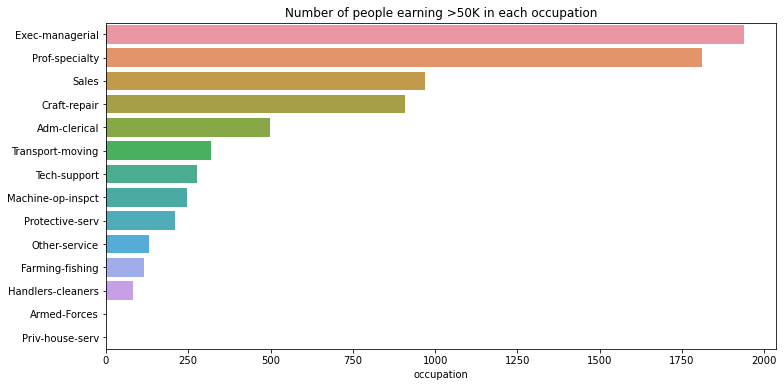

In [113]:
plt.figure(figsize=(12,6))
sns.barplot(x=high_salary.occupation.value_counts(),y=high_salary.occupation.value_counts().index)
plt.title("Number of people earning >50K in each occupation");

It looks like people who are Executive Manager earn a more compared to the other fields

#### Q5: What is the most preferd occupation of the blacks and what are thier salary trends?

In [115]:
blacks_df=details_df[details_df.race=="Black"]

In [116]:
blacks_df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
10,37,Private,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
13,32,Private,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32514,40,Private,11,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,45,United-States,<=50K
32521,33,Private,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K
32535,22,Private,8,Never-married,Protective-serv,Own-child,Black,Male,0,0,35,United-States,<=50K
32537,30,Private,9,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,46,United-States,<=50K


#### Number of people earning >50 and <=50K

In [117]:
blacks_df[blacks_df.salary==">50K"]

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
10,37,Private,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
45,57,Federal-gov,13,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,40,United-States,>50K
117,49,Local-gov,11,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,>50K
180,44,Local-gov,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,38,United-States,>50K
206,36,Private,13,Married-civ-spouse,Other-service,Husband,Black,Male,7298,0,36,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31743,38,Local-gov,15,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,40,United-States,>50K
31745,57,Federal-gov,15,Divorced,Exec-managerial,Not-in-family,Black,Male,0,0,55,United-States,>50K
31795,58,Local-gov,14,Married-civ-spouse,Prof-specialty,Husband,Black,Male,7688,0,30,United-States,>50K
31842,42,Private,10,Married-civ-spouse,Transport-moving,Husband,Black,Male,7688,0,45,United-States,>50K


There are around 366 blacks who earn >50K and previously we have seen overall there are 7508 people who earn >50K

In [119]:
blacks_df.occupation.value_counts()

Other-service        553
Adm-clerical         480
Machine-op-inspct    269
Sales                248
Exec-managerial      235
Craft-repair         234
Prof-specialty       226
Handlers-cleaners    170
Transport-moving     167
Protective-serv       98
Tech-support          67
Farming-fishing       42
Priv-house-serv       27
Armed-Forces           1
Name: occupation, dtype: int64

It looks like most of the blacks work as admistrative clerks and various other jobs.

#### Q6:What number of women are earning >50K and <=50K

In [122]:
women_df=details_df[details_df.sex=="Female"]

In [123]:
women_df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,9782.000000,9782.000000,9782.000000,9782.000000,9782.000000
mean,36.883459,10.098651,570.176753,60.938765,36.932222
std,13.532427,2.366998,4919.656134,337.980599,11.429769
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,25.250000,9.000000,0.000000,0.000000,33.000000
50%,35.000000,10.000000,0.000000,0.000000,40.000000
75%,46.000000,12.000000,0.000000,0.000000,40.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


I have sepearated the women from the main data set and we also have the basic statistics 
And most have the women also have a very good educational standards.

In [127]:
highsal_df=women_df[women_df.salary==">50K"]

In [128]:
lowsal_df=women_df[women_df.salary=="<=50K"]

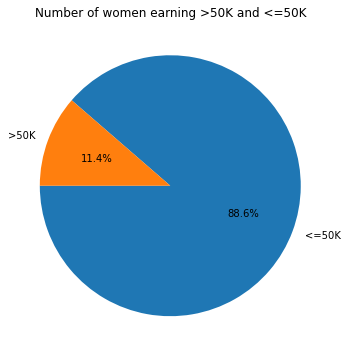

In [132]:
plt.figure(figsize=(12,6))
plt.title("Number of women earning >50K and <=50K")
plt.pie(women_df.salary.value_counts(), labels=women_df.salary.value_counts().index, autopct='%1.1f%%', startangle=180);

Among the women in the dataframe about 11% of the women earn >50K and 88% earn <=50K

In [133]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bhanukrishnaprasad/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/bhanukrishnaprasad/zerotopandas-course-project-starter


'https://jovian.ai/bhanukrishnaprasad/zerotopandas-course-project-starter'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [65]:
import jovian

In [66]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bhanukrishnaprasad/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/bhanukrishnaprasad/zerotopandas-course-project-starter


'https://jovian.ai/bhanukrishnaprasad/zerotopandas-course-project-starter'

## References and Future Work

The dataset that have selected has most of the data collected from United States so in some cases I have selected the countries other than US.
We can also extend the analysis futher by adding more data from other countiers and adding a better range in the salary.

I have found geekforgeeks page very helpful and I have gone thorugh the tutorial video of jovian.ml https://www.geeksforgeeks.org/pandas-tutorial/ 
https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/

In [134]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bhanukrishnaprasad/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
